In [4]:
%matplotlib inline

In [5]:
import numpy as np
import mne
from mne.datasets import sample

data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
raw = mne.io.read_raw_fif(raw_fname)  # already has an EEG ref

Opening raw data file /local_mount/space/meghnn/1/users/mjas/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0


Marking bad channels
==================

In [6]:
raw.info['bads'] = ['MEG 2443']

It's not only `raw`. You can mark bads also in `evoked`.

Reading /local_mount/space/meghnn/1/users/mjas/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)


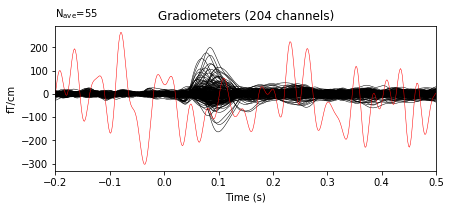

In [12]:
# Reading data with a bad channel marked as bad:
fname = data_path + '/MEG/sample/sample_audvis-ave.fif'
evoked = mne.read_evokeds(fname, condition='Left Auditory',
                          baseline=(None, 0))
evoked.pick_types(meg='grad', eeg=False, exclude=[])

# plot with bads
evoked.plot(exclude=[], time_unit='s');

In [13]:
evoked.interpolate_bads(reset_bads=False, verbose=False);

Let’s plot the cleaned data

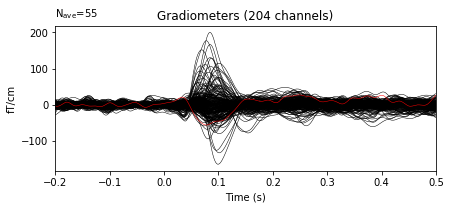

In [14]:
evoked.plot(exclude=[], time_unit='s');

Rejection thresholds
--------------------

In [106]:
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)

In [107]:
events = mne.find_events(raw, stim_channel='STI 014')
event_id = {"auditory/left": 1}
tmin, tmax = -0.2, 0.5
baseline = (None, 0)  # means from the first instant to t = 0
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=True,
                       stim=False, exclude='bads')
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks_meg, baseline=baseline, reject=reject,                    
                    preload=True)

319 events found
Event IDs: [ 1  2  3  4  5 32]
72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
4 projection items activated
Loading data for 72 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    R

Tuning rejection thresholds
---------------------------

In [108]:
import matplotlib.pyplot as plt
from ipywidgets import interact

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks, baseline=baseline, reject=None,                    
                    preload=True)

def reject_epochs(reject):
    reject = dict(eeg=reject * 1e-6)
    evoked = epochs.copy().drop_bad(reject=reject, verbose=False).average()
    evoked.plot(spatial_colors=True)
    print('Number of epochs retained: %d/%d' % (evoked.nave, len(epochs)))

72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 1)
4 projection items activated
Loading data for 72 events and 106 original time points ...
0 bad epochs dropped


In [109]:
interact(reject_epochs, reject=(35, 250, 10));

interactive(children=(IntSlider(value=135, description='reject', max=250, min=35, step=10), Output()), _dom_cl…

In [105]:
from autoreject import get_rejection_threshold  # noqa
reject = get_rejection_threshold(epochs)
print(reject)

Estimating rejection dictionary for eeg
Estimating rejection dictionary for eog
{'eeg': 8.687666582562178e-05, 'eog': 3.313052780665323e-05}
